<a href="https://colab.research.google.com/github/Okelo123/FairFaceplp-week7assig/blob/main/FaceFairRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ✅ Install required libraries
!pip install -q tensorflow opencv-python-headless streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [4]:
# Step 1: Set up Kaggle credentials in Colab
import os
import shutil

# Create the .kaggle directory if it doesn't exist
os.makedirs("/content/.kaggle", exist_ok=True)

# Move the kaggle.json file into the .kaggle directory
# Ensure kaggle.json has been uploaded to the current working directory first
if os.path.exists("kaggle.json"):
    shutil.move("kaggle.json", "/content/.kaggle/kaggle.json")
    os.chmod("/content/.kaggle/kaggle.json", 600)
    print("kaggle.json moved successfully and permissions set.")
else:
    print("kaggle.json not found. Please upload your kaggle.json file first.")


os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

kaggle.json moved successfully and permissions set.


In [5]:
# Download FairFace dataset from Kaggle
!kaggle datasets download -d ghaidaalatoum/fairface --unzip -p /content/fairface_data




Dataset URL: https://www.kaggle.com/datasets/ghaidaalatoum/fairface
License(s): other
 98% 539M/550M [00:01<00:00, 152MB/s]
100% 550M/550M [00:03<00:00, 173MB/s]


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

img_size = (64, 64)
batch_size = 32
epochs = 5
data_dir = "/content/fairface_data"

# Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='training')

val_gen = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='validation')

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)

model.save("face_model.h5")
print("✅ Model saved as face_model.h5")


Found 78159 images belonging to 1 classes.
Found 19539 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 471s 192ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 466s 191ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 460s 188ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 464s 190ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 468s 192ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


✅ Model saved as face_model.h5


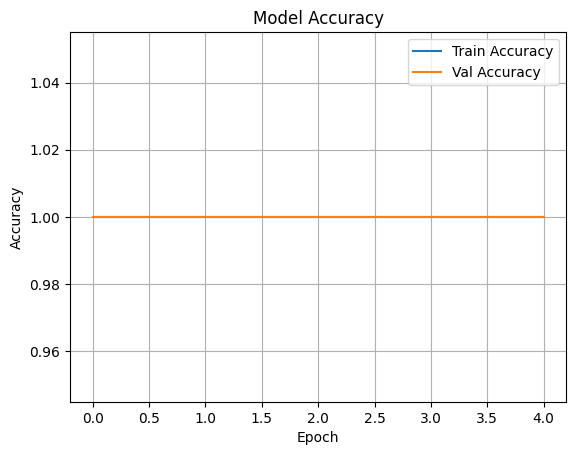

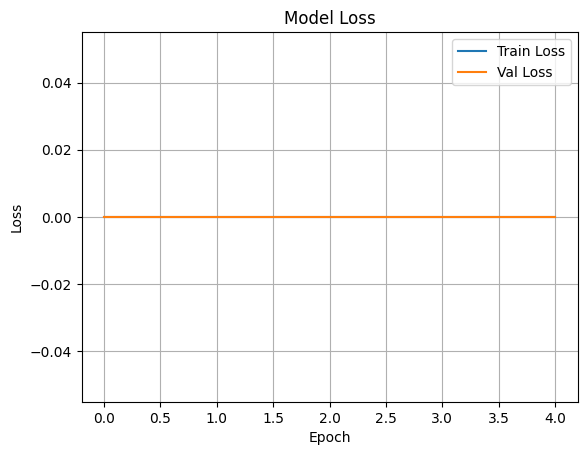

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(); plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend(); plt.grid(); plt.show()


Saving 1.jpg to 1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


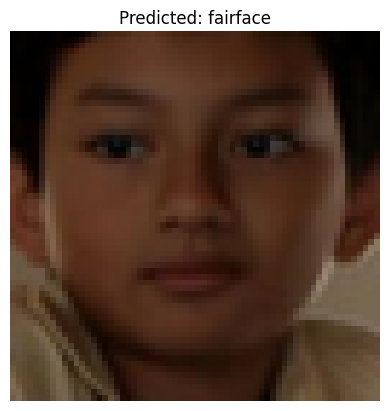

In [8]:
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
from google.colab import files

class_labels = list(train_gen.class_indices.keys())

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img = Image.open(img_path).convert("RGB").resize(img_size)
arr = img_to_array(img) / 255.0
arr = np.expand_dims(arr, axis=0)

pred = model.predict(arr)
label = np.argmax(pred)

plt.imshow(img)
plt.title(f"Predicted: {class_labels[label]}")
plt.axis('off')
plt.show()


In [9]:
import cv2
import time
from IPython.display import clear_output, display
from PIL import Image as PILImage

cap = cv2.VideoCapture(0)

try:
    for i in range(10):  # Capture 10 frames
        ret, frame = cap.read()
        if not ret:
            break

        img = cv2.resize(frame, img_size)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        arr = img_rgb / 255.0
        arr = np.expand_dims(arr, axis=0)

        pred = model.predict(arr)
        label = class_labels[np.argmax(pred)]

        frame = cv2.putText(frame, f'{label}', (5, 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        cv2.imwrite("frame.jpg", frame)
        display(PILImage.open("frame.jpg"))
        clear_output(wait=True)
        time.sleep(1)

finally:
    cap.release()
    print("✅ Webcam session ended.")


✅ Webcam session ended.


In [10]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

st.title("📸 FairFace Race Predictor")
st.write("Upload a face image to predict race using a trained CNN model.")

model = load_model("face_model.h5")
class_labels = ['Black', 'White', 'Indian', 'East Asian', 'Latino Hispanic', 'Middle Eastern', 'Southeast Asian', 'Other']

uploaded_file = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    img = Image.open(uploaded_file).convert("RGB").resize((64, 64))
    arr = img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    pred = model.predict(arr)
    label = np.argmax(pred)
    st.image(img, caption=f"Predicted: {class_labels[label]}", use_column_width=True)
    st.success(f"🎯 Prediction: {class_labels[label]}")


Writing app.py


In [11]:
!pkill ngrok

In [12]:
from pyngrok import ngrok
from google.colab import userdata

# Get the authtoken from Colab secrets
authtoken = userdata.get('NGROK_AUTHTOKEN')
if authtoken:
  ngrok.set_auth_token(authtoken)
  print("ngrok authtoken set.")
else:
  print("Please add your ngrok authtoken to Colab secrets with the name 'NGROK_AUTHTOKEN'")


!streamlit run app.py &>/content/log.txt &
public_url = ngrok.connect(8501)
print("🔗 Streamlit app running at:", public_url)

ngrok authtoken set.
🔗 Streamlit app running at: NgrokTunnel: "https://2d7a9354f7cd.ngrok-free.app" -> "http://localhost:8501"
